**Using the Kaggle API to downlaod the necessary dataset**

In [42]:
import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files("blastchar/telco-customer-churn", path=".", unzip=True)


Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


**Addition commands using the kaggle API**

In [43]:
# Extracts a JSON file of the metadata for a given dataset
kaggle.api.dataset_metadata("blastchar/telco-customer-churn", path=".")

# List all the data files in a given dataset
print(kaggle.api.dataset_list_files("blastchar/telco-customer-churn").files)

# Provides a list of dataset that contain the search word(s)
datasets = kaggle.api.dataset_list(search="customer churn")
print(datasets)

[]
[blastchar/telco-customer-churn, barun2104/telecom-churn, radheshyamkollipara/bank-customer-churn, muhammadshahidazeem/customer-churn-dataset, gauravtopre/bank-customer-churn-dataset, shubhammeshram579/bank-customer-churn-prediction, shantanudhakadd/bank-customer-churn-prediction, anandshaw2001/customer-churn-dataset, rashadrmammadov/customer-churn-dataset, saurabhbadole/bank-customer-churn-prediction-dataset, mathchi/churn-for-bank-customers, abdullah0a/telecom-customer-churn-insights-for-analysis, santoshd3/bank-customers, divu2001/customer-churn-rate, abdallahwagih/telco-customer-churn, alfathterry/telco-customer-churn-11-1-3, mehmetsabrikunt/internet-service-churn, shilongzhuang/telecom-customer-churn-by-maven-analytics, tejashvi14/tour-travels-customer-churn-prediction, yeanzc/telco-customer-churn-ibm-dataset]


**Assign the dataset to the "data" variable so we can analyse it**

In [44]:
import pandas as pd

data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

**Obtain information about the data set, each column (such as data types)** 

In [45]:
# To view all column names and their respective data types
data.columns
data.info()
data.describe() # Shows statistical summaries for all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Perform data cleaning**

**TotalCharges might be a string in some cases. Therefore, we need to convert it to numeric before training:**

In [46]:
# Convert following object type columns to numeric        
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [47]:
# Drop the "customerID" column since it does not provide any information therefore is not required 
data.drop(['customerID'], axis = 1, inplace = True)

# get the number of missing data points per column
missing_values_count = data.isnull().sum()
missing_values_count

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

It is clear to see that there are missing values in this datset, specifically in the "TotalCharges" feature 

We can either remove these rows with the missing data or impute the values for the missing rows using the mean. We will use both methods and see which results in the better performing models. 

In [72]:
# Creating a new dataframe by removing the rows containing missing values 
data_dropped = pd.DataFrame(data.dropna())
# print(data_dropped.isnull().sum())

#Creating a new dataframe by filling the missing values with zero
data_zero = pd.DataFrame(data.fillna(0.0))
# print(data_zero.isnull().sum())

In [75]:
unique_values1 = data_dropped.nunique(axis=0)
print(unique_values1)
unique_values2 = data_zero.nunique(axis=0)
# print(unique_values2)


gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


**Based on the number of unique values of each feature, we need to encode the features so we can use them to train our ML algorithms**

**First we perform binary encoding on the features that only have 2 unique values**

**Then we perform One-Hot-Encoding on the features that 3 or more unique values**

In [96]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify binary and categorical columns
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
categorical_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
target_col = 'Churn'  # Keep target at the end

# Ensure copies to avoid SettingWithCopyWarning
data_dropped = data_dropped.copy()
data_zero = data_zero.copy()

# Label Encoding for binary columns
for col in binary_cols:
    le = LabelEncoder()
    data_dropped[col] = le.fit_transform(data_dropped[col])
    data_zero[col] = le.transform(data_zero[col])  # Use the same encoder to keep consistency

# One-Hot Encode categorical features while maintaining column order
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoder.fit(pd.concat([data_dropped[categorical_cols], data_zero[categorical_cols]]))  # Fit once for consistency

encoded_array1 = encoder.transform(data_dropped[categorical_cols])
encoded_array2 = encoder.transform(data_zero[categorical_cols])

# Convert to DataFrame
encoded_df1 = pd.DataFrame(encoded_array1, columns=encoder.get_feature_names_out(), index=data_dropped.index)
encoded_df2 = pd.DataFrame(encoded_array2, columns=encoder.get_feature_names_out(), index=data_zero.index)

# Drop original categorical columns
df1 = data_dropped.drop(columns=categorical_cols)
df2 = data_zero.drop(columns=categorical_cols)

# Concatenate encoded columns
df1 = pd.concat([df1, encoded_df1], axis=1)
df2 = pd.concat([df2, encoded_df2], axis=1)

# Ensure the target variable is the last column
df1 = df1[[col for col in df1.columns if col != target_col] + [target_col]]
df2 = df2[[col for col in df2.columns if col != target_col] + [target_col]]

# Display final dataset with original order
print(df1.head())
# print(df2.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0                 1           29.85         29.85   
1                 0           56.95       1889.50   
2                 1           53.85        108.15   
3                 0           42.30       1840.75   
4                 1           70.70        151.65   

   MultipleLines_No phone service  ...  StreamingTV_No internet service  \
0                             1.0  ...                              0.0   
1                             0.0  ...                              0.0   
2                            

**Now lets do some statistical analysis of the data**

Lets see what the correlation of each feature is to the target feature

In [92]:
# Print correlation between all features and target variable
df1.corr()['Churn'].sort_values()

df2.corr()["Churn"].sort_values()

tenure                                  -0.352229
Contract_Two year                       -0.302253
OnlineBackup_No internet service        -0.227890
DeviceProtection_No internet service    -0.227890
OnlineSecurity_No internet service      -0.227890
InternetService_No                      -0.227890
StreamingTV_No internet service         -0.227890
TechSupport_No internet service         -0.227890
StreamingMovies_No internet service     -0.227890
TotalCharges                            -0.198324
Contract_One year                       -0.177820
OnlineSecurity_Yes                      -0.171226
TechSupport_Yes                         -0.164674
Dependents                              -0.164221
Partner                                 -0.150448
PaymentMethod_Credit card (automatic)   -0.134302
PaymentMethod_Mailed check              -0.091683
OnlineBackup_Yes                        -0.082255
DeviceProtection_Yes                    -0.066160
MultipleLines_No phone service          -0.011942


<Axes: >

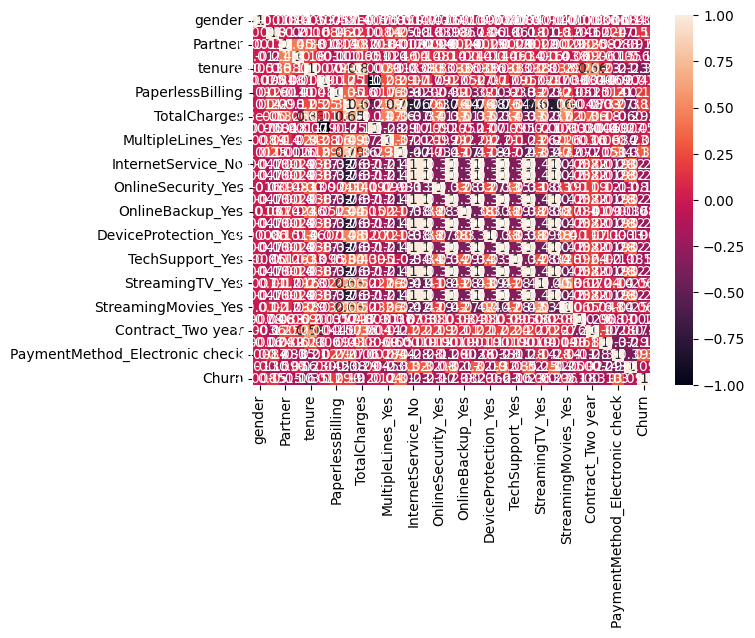

In [95]:
import seaborn as sns

# Plot heatmap using Seaborn to visualize correlation amongst ftrs.
sns.heatmap(df1.corr(), annot = True)

sns.heatmap(df2.corr(), annot = True)